# Lab | Customer Analysis Round 3

In [16]:
# your code goes here
import pandas as pd
import numpy as np

In [17]:
# Reading data into a DataFrame 
df = pd.read_csv('marketing_customer_analysis.csv')
# check
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
display(df.dtypes)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### Clean the data ###

In [ ]:
# %load "py_files/cleaning_column_names.py"
#cleaning column Names 

import numpy as np
import pandas as pd 

def to_lower_case(df: pd.DataFrame) -> pd.DataFrame:

	'''
	This changes columns in lower case 

	Input: 
	df:pd.DataFrame

	Ourput: 
	Another pd.DataFrame


	'''

	df2 = df.copy()

	cols = []
	for colname in df2.columns:
		cols.append(colname.lower())

	df2.columns = cols

	
	return df2


def column_name(df: pd.DataFrame) -> pd.DataFrame:


	'''
	Regarding column name, this replaces 'customer' of a column name with 'id', and '(space)' with '_'.   

	Input: 
	df:df.DataFrame

	Ourput: 
	Another df.DataFrame


	'''

	df2 = df.copy()
	#replace 'customer' with 'id'
	if 'customer' in df2.columns:

		df2 = df2.rename(columns={'customer':'id'})

	#replace '(space)' with '_'
	df2.columns = df2.columns.str.replace(' ', '_')

	return df2



def cleaning_column_names(df: pd.DataFrame) -> pd.DataFrame:


	'''
	This cleans column names by using two functions above.

	Input: 
	df:pd.DataFrame

	Ourput: 
	Another pd.DataFrame


	'''

	df2 = df.copy()

	df2 = to_lower_case(df2)
	df2 = column_name(df2)

	print('finished cleaning_column_names')

	return df2
	





In [20]:
# Clean the column names and check
%run -i py_files/cleaning_column_names.py

df2 = cleaning_column_names(df)

finished cleaning_column_names


In [21]:
# change the type of "number_of_open_complaints" into int64.
df2["number_of_open_complaints"] = pd.array(df2["number_of_open_complaints"], dtype=pd.Int64Dtype())

In [ ]:
# %load py_files/clean_invalid_values.py
import numpy as np
import pandas as pd 


#gender
def clean_gender(df: pd.DataFrame) -> pd.DataFrame:
    '''
    The values of 'gender' are chanhed into only 'F','M' and 'U'
    
    Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame
    '''

    df2 = df.copy()
    
    #Change the first text in upper case.
    df2["gender"] = df2["gender"].apply(lambda x: x[0].upper() if x is not np.nan else np.nan)
    
    # Divide values into 'F','M' and nan
    df2["gender"] = df2["gender"].apply(lambda x: x if x in ["F","M"] else np.nan)
    
            
    
    return df2





#st
def clean_st(df: pd.DataFrame) -> pd.DataFrame:
    '''
    The values of 'Cali','AZ' and 'WA' are changed into 'California', 'Arizona', 'Washington', respectively
    
    Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame
    '''

    df2 = df.copy()
    
    # Change words here.
    df2["st"] = df2["st"].apply(lambda x: 'California' if x == 'Cali' else x)
    df2["st"] = df2["st"].apply(lambda x: 'Arizona' if x == 'AZ' else x)
    df2["st"] = df2["st"].apply(lambda x: 'Washington' if x == 'WA' else x)
    return df2



#education

def clean_education(df: pd.DataFrame) -> pd.DataFrame:
    '''
    The values of 'College', 'Bachelors' are chanhed into 'Bachelor'
    
    Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame
    '''
    df2 = df.copy()
    
    # Change words here.
    df2["education"] = df2["education"].apply(lambda x: 'Bachelor' if x == 'Bachelors' else x)
    df2["education"] = df2["education"].apply(lambda x: 'Bachelor' if x == 'College' else x)
    
    return df2






#clean invalid values ('gender', 'st' and 'education')


def clean_invalid_values(df: pd.DataFrame) -> pd.DataFrame:

    '''

	Clean values of 'gender','st' and 'education' using three functions above.

	Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame

    '''

    df2 = df.copy()

    df2 = clean_gender(df2)
    df2 = clean_st(df2)
    df2 = clean_education(df2)

    print("finished 'clean_invalid_values'")

    return df2


In [23]:
# Clean invalid values
%run -i py_files/clean_invalid_values.py
#change the column name from 'state' into 'st'
df2 = df2.rename(columns={'state': 'st'})

df3 = clean_invalid_values(df2)

finished 'clean_invalid_values'


In [ ]:
# %load py_files/dealing_with_null_values_and_duplicates.py
#dealing with null values and duplicates.

import numpy as np
import pandas as pd 

def drop_null_id(df: pd.DataFrame) -> pd.DataFrame:
	'''
	Drop the null values of 'id'

	Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame


	'''

	df2 = df.copy()

	df2[ df2['id'].isna()==False ]

	return df2


def drop_null_gender(df: pd.DataFrame) -> pd.DataFrame:
	'''
	Drop the null values of 'gender'

	Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame


	'''

	df2 = df.copy()

	df2 = df2[ df2['gender'].isna()==False ]

	return df2



def clv_replace(df: pd.DataFrame) -> pd.DataFrame:
	'''
	The null values in 'customer lifetime value' are replaced with the mean

	Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame


	'''

	df2 = df.copy()
	#mean
	mean_customer_lifetime_value = df2['customer_lifetime_value'].mean()


	# Round off the mean to 2 decimal places.
	mean = round(mean_customer_lifetime_value, 2)
	# replace null values with the mean.

	df2['customer_lifetime_value'] = df2['customer_lifetime_value'].fillna(mean)

	print("finished 'clv_replace'")
	print("The mean value of the column {} is {}".format('customer_lifetime_value',mean))


	return df2


def drop_duplicates(df: pd.DataFrame) -> pd.DataFrame:
	'''
	The null values in 'customer lifetime value' are replaced with the mean

	Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame


	'''

	df2 = df.copy()

	df2 = df2.drop_duplicates()

	print("finished 'drop_duplicates'")
	print('The number of data before dropping duplicates is',(len(df)))
	print( 'The number of data which dropped duplicates is', len(df2))

	return df2



def deal_with_null_and_duplicates(df: pd.DataFrame) -> pd.DataFrame:
	'''
	Dealing with null values and duplicates by using four functions above.

	Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame


	'''

	df2 = df.copy()

	df2 = drop_null_id(df2)
	df2 = drop_null_gender(df2)
	df2 = clv_replace(df2)
	df2 = drop_duplicates(df2)
	


	print("finished 'deal_with_null_and_duplicates'")

	return df2



In [25]:
%run -i py_files/dealing_with_null_values_and_duplicates.py

df4 = deal_with_null_and_duplicates(df3)

finished 'clv_replace'
The mean value of the column customer_lifetime_value is 8004.94
finished 'drop_duplicates'
The number of data before dropping duplicates is 9134
The number of data which dropped duplicates is 9134
finished 'deal_with_null_and_duplicates'


In [ ]:
# %load py_files/date_change.py
# Change the type of date

def date_type(df:pd.DataFrame) -> pd.DataFrame:

    '''

    This function change the date types into datetime
    Input: 
    df: pd.DataFrame
    
    Output:
    Another pd.DataFrame

    '''

    df2 = df.copy()
    df2['effective_to_date'] = pd.to_datetime(df2['effective_to_date'], errors='coerce')
    print('date type was changed')

    return df2




# Extract each month
def extract_mt(df:pd.DataFrame, l: list = []) -> list:

    '''

    This function extraxts each month from the column of datetime and create a list.
    Input: 
    df: pd.DataFrame
    l : list
    
    Output:
    Another list

    '''
    df2 = df.copy(0)

    l = df2["effective_to_date"].apply(lambda x: x.month)

    return l 







In [27]:
# excute the function of date_change
df5 = df4.copy()
%run -i py_files/date_change.py

df5 = date_type(df5)
month = extract_mt(df5)


date type was changed


In [28]:
#add the column of 'month'

df5['month'] = month
df5.columns


Index(['id', 'st', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'month'],
      dtype='object')

In [29]:
#check the null values
df5.isnull().sum()

id                               0
st                               0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
month                            0
dtype: int64

It is impossible to replace the null values of 'vehicle_type'. Therefore, they are removed.

In [30]:
df5.head()

,id,st,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [32]:
df5.isnull().sum()

id                               0
st                               0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
month                            0
dtype: int64

Now the data was cleared and questions will be solved.

## Question

1. Show DataFrame info.

In [33]:
data = df5.copy() 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             9134 non-null   object        
 1   st                             9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

2.Describe DataFrame.

In [38]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


3.Show a plot of the total number of responses.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

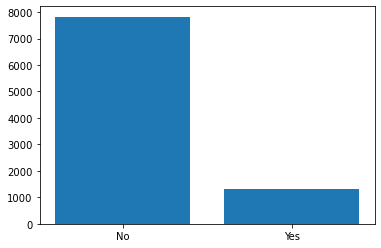

In [44]:
fig, ax = plt.subplots()
ax.bar(x = data['response'].value_counts().index, height = data['response'].value_counts().values)
plt.show()

4.Show a plot of the response rate by the sales channel.

In [71]:
 #Calculate the response rate by sales channel
    
display(data.groupby(['sales_channel', 'response']))
response_rate = data.groupby(['sales_channel', 'response']).size() / data.groupby('sales_channel').size()

response_rate *= 100
display(response_rate)
response_rate = response_rate.reset_index(name='response_rate (%)')
display(response_rate)

sales_channel  response
Agent          No          80.845557
               Yes         19.154443
Branch         No          88.546942
               Yes         11.453058
Call Center    No          89.121813
               Yes         10.878187
Web            No          88.226415
               Yes         11.773585
dtype: float64

,sales_channel,response,response_rate (%)
0,Agent,No,80.845557
1,Agent,Yes,19.154443
2,Branch,No,88.546942
3,Branch,Yes,11.453058
4,Call Center,No,89.121813
5,Call Center,Yes,10.878187
6,Web,No,88.226415
7,Web,Yes,11.773585


<Figure size 720x432 with 0 Axes>

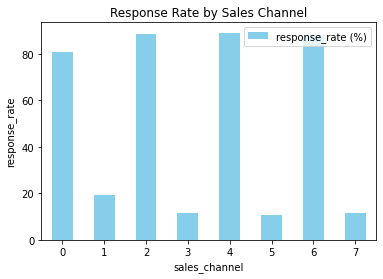

In [75]:

# Plot the response rate
plt.figure(figsize=(10, 6))
response_rate.plot(kind='bar', color='skyblue')
plt.title('Response Rate by Sales Channel')
plt.xlabel('sales_channel')
plt.ylabel('response_rate')
plt.xticks(rotation=0)

 
# Display the plot
plt.show()



5.Show a plot of the response rate by the total claim amount.

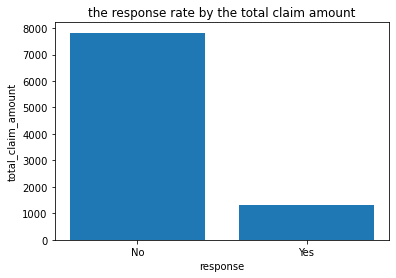

In [81]:
fig, ax = plt.subplots()
ax.bar(x = data['response'].value_counts().index, height = data['response'].value_counts().values)
ax.set_xlabel("response")
ax.set_ylabel("total_claim_amount")
plt.title('the response rate by the total claim amount')
plt.show()

6.Show a plot of the response rate by income.

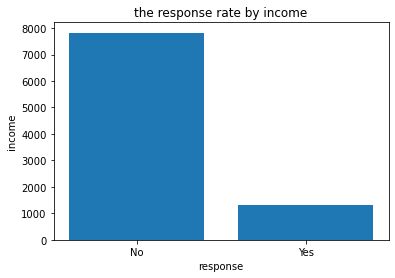

In [83]:
fig, ax = plt.subplots()
ax.bar(x = data['response'].value_counts().index, height = data['response'].value_counts().values)
ax.set_xlabel("response")
ax.set_ylabel("income")
plt.title('the response rate by income')
plt.show()